In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd

In [3]:
c = 2.99792458E10  # cm per sec, light speed
h = 6.626070040812E-27  # erg*sec, Planck constant
k = 1.380648528E-16  # erg/K, Boltzmann constant
sun_radius = 695700 * 10 ** 5 #cm
parsec = 3.086e+18 #cm

filters = {'FUV' : 0.15, # microns
           'NUV' : 0.23,
             'U' : 0.36,
             'B' : 0.44,
             'V' : 0.55,
             'R' : 0.67,
             'I' : 0.79,
             'J' : 1.24,
             'H' : 1.65,
             'K' : 2.16}

In [4]:
fig_dir =  Path('./../reports/figures/')

In [5]:
def brightness(freq, temperature, tau=0):
    return np.pi * 2 * h * freq**3 / c**2 / (np.exp(h * freq / (k * temperature)) - 1) * \
           np.exp(- tau * (freq2wavelength(freq) / 0.55 * 1e4) ** (-0.7))
def wavelength2freq(lambda_):
    """uses lambda in cm to convert to 1/s"""
    return c / lambda_
def freq2wavelength(freq):
    """uses frequence to convert to cm"""
    return c / freq 
def calculate_magnitude(flux):
    return - 2.5 * np.log10(flux) - 48.60

def calculate_color_index(filter1, filter2, T, tau=0):
    return calculate_magnitude(brightness(wavelength2freq(filters[filter1] / 1e4), T, tau)) - \
           calculate_magnitude(brightness(wavelength2freq(filters[filter2] / 1e4), T, tau))

def calculate_abs_magnitude(filter1, logT, logR):
    return calculate_magnitude(brightness(wavelength2freq(filter1 / 1e4), 10 ** logT)
                    * 10 ** (2 * logR) / 10 ** 2 * (sun_radius / parsec) ** 2 )

def calculate_abs_color_index(filter1, filter2, logT, logR):
    return calculate_abs_magnitude(filter1, logT, logR) - calculate_abs_magnitude(filter2, logT, logR)

In [6]:
temperatures = np.array([3500, 5000, 6000, 7000, 10000, 20000, 50000])

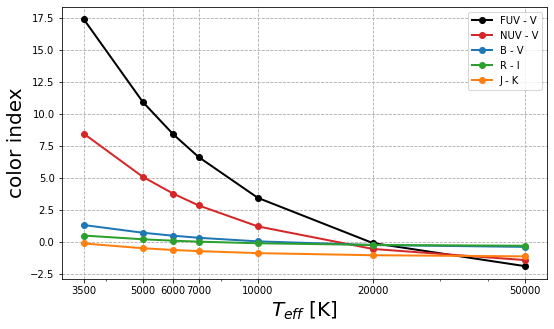

In [7]:
fig, ax = plt.subplots(figsize=(8.7, 5))
ax.plot(temperatures, calculate_color_index('FUV', 'V', temperatures), label='FUV - V',
        c='black', marker='o', lw=2, zorder=10)

ax.plot(temperatures, calculate_color_index('NUV', 'V', temperatures), label='NUV - V',
            c='tab:red', marker='o', lw=2, zorder=10)

ax.plot(temperatures, calculate_color_index('B', 'V', temperatures), label='B - V',
            c='tab:blue', marker='o', lw=2, zorder=10)

ax.plot(temperatures, calculate_color_index('R', 'I', temperatures), label='R - I',
            c='tab:green', marker='o', lw=2, zorder=10)

ax.plot(temperatures, calculate_color_index('J', 'K', temperatures), label='J - K',
            c='tab:orange', marker='o', lw=2, zorder=10)

# plt.yscale('log')
plt.xscale('log')
ax.grid(c='#aaaaaa', ls='--', zorder=100)

ax.set_xticks(temperatures)
ax.set_xticklabels(temperatures)

plt.legend()
plt.ylabel(r"color index", size=20)
plt.xlabel(r"$T_{eff}$ [K]", size=20)
plt.savefig(fig_dir / '1colors.png', dpi=300, bbox_inches='tight')

In [8]:
taus = [0, 1.0, 3.0]

In [9]:
temps = np.arange(3500,50000,0.1)

In [10]:
calculate_color_index('FUV', 'V', temps, tau=taus[1])

array([19.01874278, 19.01812465, 19.01750655, ..., -0.30441978,
       -0.30442188, -0.30442397])

In [11]:
calculate_magnitude(brightness(wavelength2freq(filters['V'] / 1e4), temps, taus[0]))

array([-35.17356288, -35.17379486, -35.17402683, ..., -43.69488145,
       -43.69488424, -43.69488703])

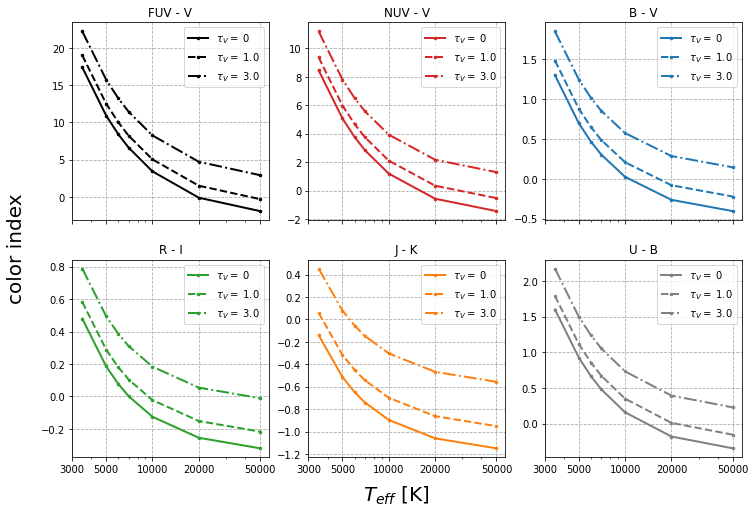

In [12]:
fig, ax = plt.subplots(2, 3, figsize=(12, 8), sharex=True)

ax[0][0].plot(temperatures, calculate_color_index('FUV', 'V', temperatures, tau=taus[0]), label=fr'$\tau_V=$ {taus[0]}',
                c='black', marker='o', ls='-', markersize=2.5, lw=2, zorder=10)
ax[0][0].plot(temperatures, calculate_color_index('FUV', 'V', temperatures, tau=taus[1]), label=fr'$\tau_V=$ {taus[1]}',
                c='black', marker='o', ls='--', markersize=2.5, lw=2, zorder=10)
ax[0][0].plot(temperatures, calculate_color_index('FUV', 'V', temperatures, tau=taus[2]), label=fr'$\tau_V=$ {taus[2]}',
                c='black', marker='o', ls='-.', markersize=2.5, lw=2, zorder=10)
ax[0][0].set_title('FUV - V')

ax[0][1].plot(temperatures, calculate_color_index('NUV', 'V', temperatures, tau=taus[0]), label=fr'$\tau_V=$ {taus[0]}',
                c='tab:red', marker='o', ls='-', markersize=2.5, lw=2, zorder=10)
ax[0][1].plot(temperatures, calculate_color_index('NUV', 'V', temperatures, tau=taus[1]), label=fr'$\tau_V=$ {taus[1]}',
                c='tab:red', marker='o', ls='--', markersize=2.5, lw=2, zorder=10)
ax[0][1].plot(temperatures, calculate_color_index('NUV', 'V', temperatures, tau=taus[2]), label=fr'$\tau_V=$ {taus[2]}',
                c='tab:red', marker='o', ls='-.', markersize=2.5, lw=2, zorder=10)
ax[0][1].set_title('NUV - V')

ax[0][2].plot(temperatures, calculate_color_index('B', 'V', temperatures, tau=taus[0]), label=fr'$\tau_V=$ {taus[0]}',
                c='tab:blue', marker='o', ls='-', markersize=2.5, lw=2, zorder=10)
ax[0][2].plot(temperatures, calculate_color_index('B', 'V', temperatures, tau=taus[1]), label=fr'$\tau_V=$ {taus[1]}',
                c='tab:blue', marker='o', ls='--', markersize=2.5, lw=2, zorder=10)
ax[0][2].plot(temperatures, calculate_color_index('B', 'V', temperatures, tau=taus[2]), label=fr'$\tau_V=$ {taus[2]}',
                c='tab:blue', marker='o', ls='-.', markersize=2.5, lw=2, zorder=10)
ax[0][2].set_title('B - V')

ax[1][0].plot(temperatures, calculate_color_index('R', 'I', temperatures, tau=taus[0]), label=fr'$\tau_V=$ {taus[0]}',
                c='tab:green', marker='o', ls='-', markersize=2.5, lw=2, zorder=10)
ax[1][0].plot(temperatures, calculate_color_index('R', 'I', temperatures, tau=taus[1]), label=fr'$\tau_V=$ {taus[1]}',
                c='tab:green', marker='o', ls='--', markersize=2.5, lw=2, zorder=10)
ax[1][0].plot(temperatures, calculate_color_index('R', 'I', temperatures, tau=taus[2]), label=fr'$\tau_V=$ {taus[2]}',
                c='tab:green', marker='o', ls='-.', markersize=2.5, lw=2, zorder=10)
ax[1][0].set_title('R - I')

ax[1][1].plot(temperatures, calculate_color_index('J', 'K', temperatures, tau=taus[0]), label=fr'$\tau_V=$ {taus[0]}',
                c='tab:orange', marker='o', ls='-', markersize=2.5, lw=2, zorder=10)
ax[1][1].plot(temperatures, calculate_color_index('J', 'K', temperatures, tau=taus[1]), label=fr'$\tau_V=$ {taus[1]}',
                c='tab:orange', marker='o', ls='--', markersize=2.5, lw=2, zorder=10)
ax[1][1].plot(temperatures, calculate_color_index('J', 'K', temperatures, tau=taus[2]), label=fr'$\tau_V=$ {taus[2]}',
                c='tab:orange', marker='o', ls='-.', markersize=2.5, lw=2, zorder=10)
ax[1][1].set_title('J - K')

ax[1][2].plot(temperatures, calculate_color_index('U', 'B', temperatures, tau=taus[0]), label=fr'$\tau_V=$ {taus[0]}',
                c='grey', marker='o', ls='-', markersize=2.5, lw=2, zorder=10)
ax[1][2].plot(temperatures, calculate_color_index('U', 'B', temperatures, tau=taus[1]), label=fr'$\tau_V=$ {taus[1]}',
                c='grey', marker='o', ls='--', markersize=2.5, lw=2, zorder=10)
ax[1][2].plot(temperatures, calculate_color_index('U', 'B', temperatures, tau=taus[2]), label=fr'$\tau_V=$ {taus[2]}',
                c='grey', marker='o', ls='-.', markersize=2.5, lw=2, zorder=10)
ax[1][2].set_title('U - B')

for ax_i in ax.flatten():
    ax_i.set_xscale('log')
    ax_i.grid(c='#aaaaaa', ls='--', zorder=100)

    ax_i.set_xticks(np.array([3000, 5000, 10000, 20000, 50000]))
    ax_i.set_xticklabels(np.array([3000, 5000, 10000, 20000, 50000]))
    ax_i.legend()
    
fig.text(0.5, 0.05, r"$T_{eff}$ [K]", size=20, ha='center')
fig.text(0.05, 0.4, r"color index", size=20, rotation='vertical')
plt.savefig(fig_dir / '1colors_and_opacity.png', dpi=300, bbox_inches='tight')

In [13]:
np.log10(np.e) * 2.5

1.0857362047581296

In [14]:
data_dir = Path('./../mesa-r22.05.1/star/ay204_hw0/LOGS/')

In [15]:
history = pd.read_csv(data_dir / '1M_copy.data', sep='\s+', header=2)
history = history[150:13000]

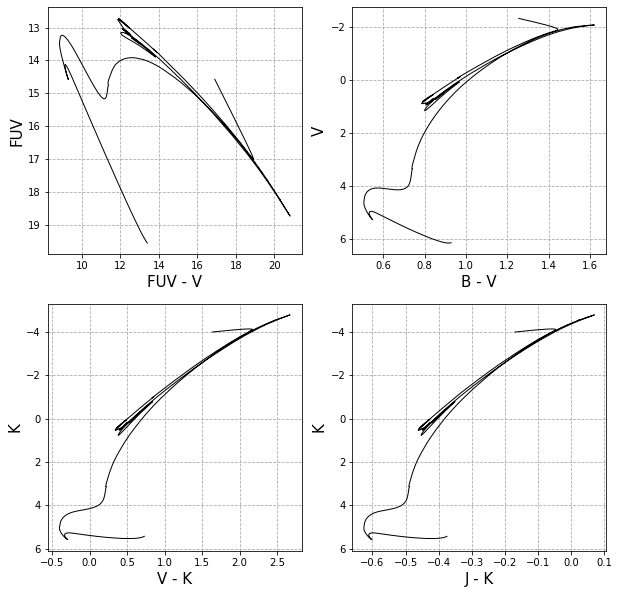

In [16]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10), )

ax[0][0].plot(calculate_abs_color_index(filters['FUV'], filters['V'], history['log_Teff'], history['log_R']),
              calculate_abs_magnitude(filters['FUV'], history['log_Teff'], history['log_R']),
                c='black', lw=1, zorder=10)
ax[0][0].set_xlabel('FUV - V', size=15)
ax[0][0].set_ylabel('FUV', size=15)

ax[0][1].plot(calculate_abs_color_index(filters['B'], filters['V'], history['log_Teff'], history['log_R']),
              calculate_abs_magnitude(filters['V'], history['log_Teff'], history['log_R']),
                c='black', lw=1, zorder=10)
ax[0][1].set_xlabel('B - V', size=15)
ax[0][1].set_ylabel('V', size=15)

ax[1][0].plot(calculate_abs_color_index(filters['V'], filters['K'], history['log_Teff'], history['log_R']),
              calculate_abs_magnitude(filters['K'], history['log_Teff'], history['log_R']),
                c='black', lw=1, zorder=10)
ax[1][0].set_xlabel('V - K', size=15)
ax[1][0].set_ylabel('K', size=15)

ax[1][1].plot(calculate_abs_color_index(filters['J'], filters['K'], history['log_Teff'], history['log_R']),
              calculate_abs_magnitude(filters['K'], history['log_Teff'], history['log_R']),
                c='black', lw=1, zorder=10)
ax[1][1].set_xlabel('J - K', size=15)
ax[1][1].set_ylabel('K', size=15)


for ax_i in ax.flatten():
    ax_i.invert_yaxis()
    ax_i.grid(c='#aaaaaa', ls='--', zorder=100)
plt.savefig(fig_dir / '1cmds.png', dpi=300, bbox_inches='tight')

In [17]:
#we observe
calculate_abs_magnitude(filters['V'], history['log_Teff'][200], history['log_R'][200])

5.242917815702505

In [18]:
solar_atmosphere = pd.read_csv('./../hw1_solar_atmosphere.dat', delimiter='\s+')

In [19]:
ns = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
n_opt = 0.7

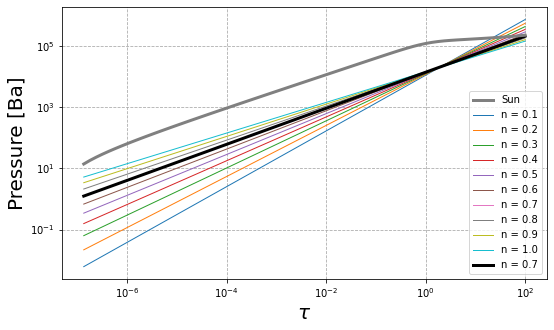

In [20]:
fig, ax = plt.subplots(figsize=(8.7, 5))
ax.plot(solar_atmosphere['tau_ross'], solar_atmosphere['Pressure(cgs)'], label='Sun',
        c='gray', lw=3, zorder=10)

for n in ns:
    ax.plot(solar_atmosphere['tau_ross'], 1e4 * ((n + 1) * solar_atmosphere['tau_ross']) ** (1 / (n + 1)), label=f'n = {n}', lw=1)

ax.plot(solar_atmosphere['tau_ross'], 1e4 * ((n_opt + 1) * solar_atmosphere['tau_ross']) ** (1 / (n_opt + 1)), label=f'n = {n_opt}', c='black',lw=3)
plt.yscale('log')
plt.xscale('log')
ax.grid(c='#aaaaaa', ls='--', zorder=100)

plt.legend(fontsize=10)
plt.ylabel(r"Pressure [Ba]", size=20)
plt.xlabel(r"$\tau$", size=20)
plt.savefig(fig_dir / '1pressure.png', dpi=300, bbox_inches='tight')

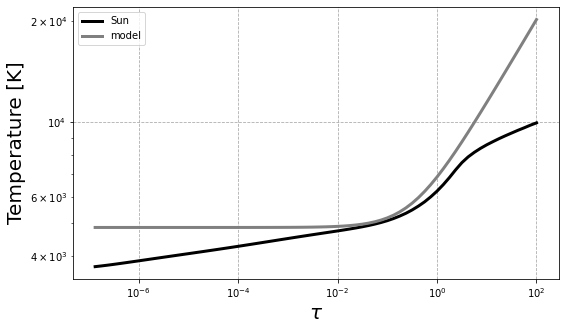

In [21]:
fig, ax = plt.subplots(figsize=(8.7, 5))
ax.plot(solar_atmosphere['tau_ross'], solar_atmosphere['Temp(K)'], label='Sun',
        c='black', lw=3, zorder=10)

ax.plot(solar_atmosphere['tau_ross'], 5780 * (3/2 * solar_atmosphere['tau_ross'] + 0.5) ** 0.25, label='model',
        c='gray', lw=3, zorder=10)

plt.yscale('log')
plt.xscale('log')
ax.grid(c='#aaaaaa', ls='--', zorder=100)

plt.legend(fontsize=10)
plt.ylabel(r"Temperature [K]", size=20)
plt.xlabel(r"$\tau$", size=20)
plt.savefig(fig_dir / '1temperature.png', dpi=300, bbox_inches='tight')

$t_{eff} (1.5 \tau+ 0.5) ^{0.25}$